In [ ]:
from keras.datasets import cifar10
from keras.layers import Input, Dense,Conv2D,MaxPooling2D,UpSampling2D,BatchNormalization
from keras.models import Model,Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(X_train, _), (X_test, _) = cifar10.load_data()
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_train = X_train.reshape(len(X_train),X_train.shape[1],X_train.shape[2],3)
X_test = X_test.reshape(len(X_test), X_test.shape[1],X_test.shape[2],3)
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
input_img = Input(shape=(32,32,3))

#Encoder
x = Conv2D(16,(3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same', name='encoder')(x)

#Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(16, (3, 3), activation='relu',padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())     # 32x32x32
model.add(Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'))      # 16x16x32
model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))      # 16x16x32
model.add(BatchNormalization())     # 16x16x32
model.add(UpSampling2D())
model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))      # 32x32x32
model.add(BatchNormalization())
model.add(Conv2D(3,  kernel_size=1, strides=1, padding='same', activation='sigmoid'))   # 32x32x3

model.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 up_sampling2d_6 (UpSampling  (None, 32, 32, 32)      

In [ ]:
autoencoder=Model(input_img, decoded)

In [ ]:
encoder = Model(input_img, encoded)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, X_train,
                epochs=15,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/15
196/196 [==============================] - 245s 1s/step - loss: 0.0042 - accuracy: 0.6954 - val_loss: 0.0249 - val_accuracy: 0.6645
Epoch 2/15
196/196 [==============================] - 244s 1s/step - loss: 0.0016 - accuracy: 0.7885 - val_loss: 0.0042 - val_accuracy: 0.7462
Epoch 3/15
196/196 [==============================] - 241s 1s/step - loss: 0.0011 - accuracy: 0.8155 - val_loss: 0.0011 - val_accuracy: 0.8087
Epoch 4/15
196/196 [==============================] - 244s 1s/step - loss: 8.2470e-04 - accuracy: 0.8304 - val_loss: 8.1508e-04 - val_accuracy: 0.8338
Epoch 5/15
196/196 [==============================] - 243s 1s/step - loss: 7.1672e-04 - accuracy: 0.8416 - val_loss: 6.8973e-04 - val_accuracy: 0.8410
Epoch 6/15
196/196 [==============================] - 243s 1s/step - loss: 6.2513e-04 - accuracy: 0.8493 - val_loss: 5.9984e-04 - val_accuracy: 0.8398
Epoch 7/15
196/196 [==============================] - 244s 1s/step - loss: 5.7046e-04 - accuracy: 0.8567 - val_loss: 0

In [ ]:
#encoded_imgs = model.predict(X_test)
predicted = model.predict(X_test)

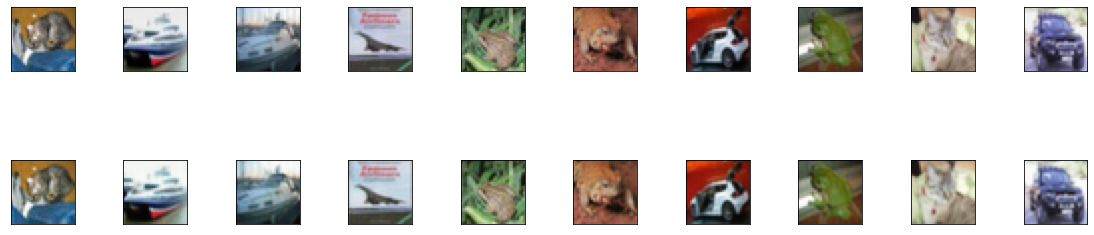

In [ ]:
plt.figure(figsize=(40,4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

    
    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)